In [106]:
# import pandas, pd is an alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
pd.set_option('display.float_format', lambda x: '%.3f' % x)
PATH_VARIABLE = './'

In [107]:

# reading files with ISO-8859-1 encoding
companies = pd.read_csv(PATH_VARIABLE + 'companies.txt', sep='\t', encoding='ISO-8859-1')
rounds2 = pd.read_csv(PATH_VARIABLE + 'rounds2.csv', encoding='ISO-8859-1')
mapping = pd.read_csv(PATH_VARIABLE + 'mapping.csv', sep=",", encoding='ISO-8859-1')


In [108]:
# analyze company data columns etc
print(companies.head(5))
print(companies.info())
print(companies.describe())

                             permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        C

In [109]:
# analyze rounds2 data columns etc
print(rounds2.head(5))
print(rounds2.info())
print(rounds2.describe())

                     company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015       10000000.000  
1                  A  14-10-2014                nan  
2                NaN  01-03-2014         700000.000  
3                  B  30-01-2014        3406878.000  
4                  A  19-03-2008      

In [110]:
# finding unique companies in rounds2
len(rounds2.company_permalink.unique())

90247

Observed permalink are case sensitive and there's a mismatch. 
Lowercasing permalinks in both companies and rounds2

In [111]:
# lowercase company_permalink
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
# finding unique companies in rounds2
len(rounds2.company_permalink.unique())

66370

In [112]:
# lowercase permalink to normalize permalink
companies['permalink'] = companies['permalink'].str.lower()
# finding unique companies
len(companies.permalink.unique())

66368

<b>Companies in the rounds2 file which are not present in companies: (66370 - 66368) = 2</b>

<b>Create master_frame by merging companies and rounds2 data frame.</b>

In [113]:
# merge rounds2 and companies
master_frame = pd.merge(rounds2, companies, how = 'inner', left_on = 'company_permalink', right_on = 'permalink')

<b> Perform data cleaning on master_frame </b>

In [114]:
print(master_frame.shape)
print(master_frame.info())

(114942, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB
None


In [115]:
# companies head info
print(master_frame.describe())

       raised_amount_usd
count          94958.000
mean        10426962.021
std        114821849.027
min                0.000
25%           322500.000
50%          1680521.000
75%          7000000.000
max      21271935000.000


In [116]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [117]:
# question 5 How many observations are present in master_frame? ans : 66363
len(master_frame.permalink.unique())

66363

In [118]:
# Identify missing values
print('Columns with atleast one null values')
print(master_frame.isnull().any())
print('Sum of all null values comlumn-wise')
# summing up the missing values (column-wise)
print(master_frame.isnull().sum())
# Rows with null values
print('Rows with null values')
master_frame.isnull().all(axis=1).sum()
# sum of misisng values in each row
master_frame.isnull().sum(axis=1)
# summing up the missing values (column-wise)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

Columns with atleast one null values
company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool
Sum of all null values comlumn-wise
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code            

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        72.910
funded_at                  0.000
raised_amount_usd         17.390
permalink                  0.000
name                       0.000
homepage_url               5.330
category_list              2.960
status                     0.000
country_code               7.540
state_code                 9.520
region                     8.840
city                       8.840
founded_at                17.850
dtype: float64

In [119]:
# removing the columns that are NOT used for analysis and amounts to high null values
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)

In [120]:
# again checking the columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
funded_at                  0.000
raised_amount_usd         17.390
permalink                  0.000
name                       0.000
category_list              2.960
status                     0.000
country_code               7.540
state_code                 9.520
region                     8.840
city                       8.840
dtype: float64

raised_amount_usd is used for analysis but it amounts to 17% of null values. We could safely remove rows since it has 17% of data missing.

In [121]:
# removing NULL raised_amount_usd rows
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink         0.000
funding_round_permalink   0.000
funding_round_type        0.000
funded_at                 0.000
raised_amount_usd         0.000
permalink                 0.000
name                      0.000
category_list             1.100
status                    0.000
country_code              6.160
state_code                8.010
region                    7.420
city                      7.420
dtype: float64

In [122]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [123]:
master_frame.shape

(94958, 13)

country_code is also used in analysis that has 6% of null values.
Hence, removing the rows having null values of country_code

In [124]:
master_frame = master_frame[~master_frame.country_code.isnull()]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink         0.000
funding_round_permalink   0.000
funding_round_type        0.000
funded_at                 0.000
raised_amount_usd         0.000
permalink                 0.000
name                      0.000
category_list             0.650
status                    0.000
country_code              0.000
state_code                1.970
region                    1.340
city                      1.340
dtype: float64

In [125]:
# removing category_list NULL rows since it's used in analysis(inner joins later with mapping data)
master_frame=master_frame[~master_frame.category_list.isnull()]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink         0.000
funding_round_permalink   0.000
funding_round_type        0.000
funded_at                 0.000
raised_amount_usd         0.000
permalink                 0.000
name                      0.000
category_list             0.000
status                    0.000
country_code              0.000
state_code                1.960
region                    1.340
city                      1.330
dtype: float64

In [126]:
# filter master_frame with 4 investment types as per the rquirement
master_frame = master_frame[master_frame.funding_round_type.isin(['venture', 'seed', 'private_equity', 'angel'])]

In [127]:
# CHCEKPOINT 2
# master_frame_copy to be used later to generate plot showing the fraction of total investments 
master_frame_copy = master_frame
by_funding_round = master_frame_copy.groupby('funding_round_type')

<function matplotlib.pyplot.show(*args, **kw)>

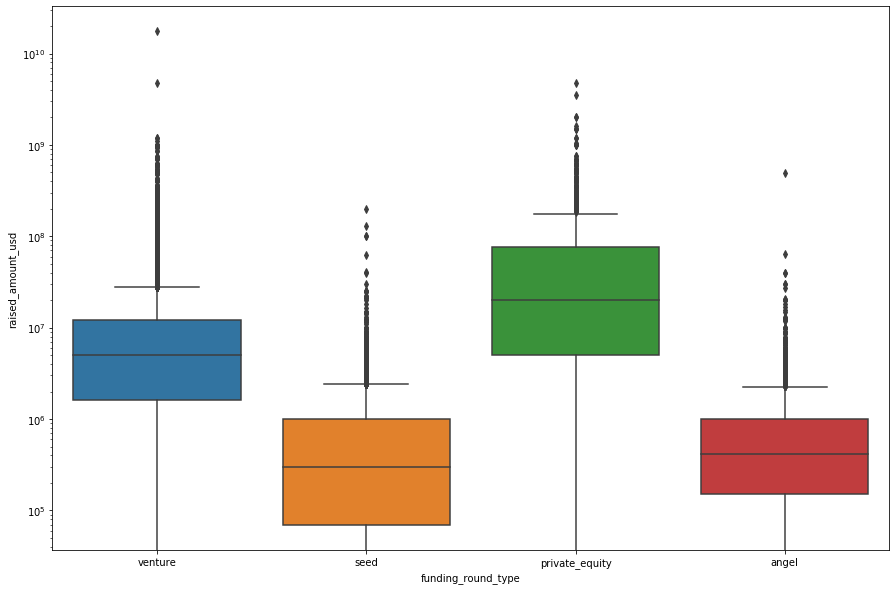

In [128]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type',y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show

In [129]:
# most representative value of the investment amount
by_funding_round['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.000,971573.891,7710904.333,0.000,152756.500,414906.000,1000000.000,494511992.000
private_equity,1820.000,73938486.275,201776467.380,0.000,5000000.000,20000000.000,75762572.000,4745460219.000
seed,21095.000,747793.682,2288317.638,0.000,68816.500,300000.000,1000000.000,200000000.000
venture,47809.000,11724222.690,88215713.615,0.000,1600000.000,5000000.000,12000000.000,17600000000.000


<b> which investment type do you think is the most suitable for Spark Funds </b> <br>
As above, venture mean is 11 mil and it's 50% is 5 mil that falls under the funding limit of 5-15 mil USD. Hence it's the best funding type for investment.

In [130]:
# filter data with venture type
master_frame = master_frame.loc[(master_frame.funding_round_type == 'venture') , :]
master_frame.shape

(47809, 13)

In [131]:
# total investment amount each country has received)
by_funding_country = master_frame.groupby(['country_code'])

In [132]:
pd.DataFrame(by_funding_country['raised_amount_usd'].sum().sort_values(ascending=False)).iloc[0:9]

,raised_amount_usd
country_code,
USA,420068029342.000
CHN,39338918773.000
GBR,20072813004.000
IND,14261508718.000
CAN,9482217668.000
FRA,7226851352.000
ISR,6854350477.000
DEU,6306921981.000
JPN,3167647127.000


<b>CHECKPOINT 3</b>

In [133]:
# make a data frame named top9 with the top nine countries
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   420068029342.000
CHN    39338918773.000
GBR    20072813004.000
IND    14261508718.000
CAN     9482217668.000
FRA     7226851352.000
ISR     6854350477.000
DEU     6306921981.000
JPN     3167647127.000
Name: raised_amount_usd, dtype: float64

<b>TOP 3 English speaking countries are</b><br>
USA<br>
GBR<br>
IND<br>

<b>CHECKPOINT 4: Sector Analysis 1</b>

In [134]:
# analyze mapping data
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


<b>CHECKPOINT 4</b>

In [135]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [136]:
# Extract the primary sector of each category list from the category_list column
# by string split and take 1st element of array
companies['primary_sector'] = companies['category_list'].str.split('|').str[0]

In [137]:
# check for additional primary sector column
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'primary_sector'],
      dtype='object')

In [138]:
# check data in primary sector column
companies[0:10]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,Mobile
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012,E-Commerce


In [139]:
# find how big is data
mapping.shape

(688, 10)

In [140]:
# get data types info
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [141]:
# find null value columns
mapping.isnull().any()

category_list                               True
Automotive & Sports                        False
Blanks                                     False
Cleantech / Semiconductors                 False
Entertainment                              False
Health                                     False
Manufacturing                              False
News, Search and Messaging                 False
Others                                     False
Social, Finance, Analytics, Advertising    False
dtype: bool

In [142]:
# we don't need to consider rows having NULL category
# clean mapping remove row with NULL category_list
mapping = mapping[~mapping.category_list.isnull()]

In [143]:
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [144]:
# removing the columns that are NOT used for analysis and amounts to high null values
mapping = mapping.drop('Blanks', axis=1)

In [145]:
round(100*(mapping.isnull().sum()/len(mapping.index)), 2)

category_list                             0.000
Automotive & Sports                       0.000
Cleantech / Semiconductors                0.000
Entertainment                             0.000
Health                                    0.000
Manufacturing                             0.000
News, Search and Messaging                0.000
Others                                    0.000
Social, Finance, Analytics, Advertising   0.000
dtype: float64

In [146]:
# map each primary sector to one of the eight main sectors
# iterate over each row and each column within and look for value > 0
# if value = 1 signifies main sector and add it as main_sector value
def mapsectors(startRow, stopRow, startCol, stopCol):
    for i in range(startRow, stopRow):
        for j in range(startCol, stopCol):
            if mapping.iloc[i, j] > 0:
                sector = mapping.columns[j]
                mapping.loc[i+1,'main_sector'] = sector

In [147]:
# call mapsectors function
mapsectors(0, len(mapping), 1, 9)

In [148]:
# check main_sector column values after above mapping
mapping.head(10)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3D,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,1,0,0,0,0,Health
6,Ad Targeting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,0,0,0,0,1,0,0,0,Manufacturing
8,Adventure Travel,1,0,0,0,0,0,0,0,Automotive & Sports
9,Advertising,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
10,Advertising Exchanges,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [149]:
# add primary_sector column that maps to category_list
# also normalize lowercase to be used for join with categories data
mapping['primary_sector'] = mapping['category_list'].str.lower()

In [150]:
# check primary_sector data is correct
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector,primary_sector
1,3D,0,0,0,0,1,0,0,0,Manufacturing,3d
2,3D Printing,0,0,0,0,1,0,0,0,Manufacturing,3d printing
3,3D Technology,0,0,0,0,1,0,0,0,Manufacturing,3d technology
4,Accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising",accounting
5,Active Lifestyle,0,0,0,1,0,0,0,0,Health,active lifestyle


In [151]:
# normalize primary_sector data in companies
companies['primary_sector'] = companies['primary_sector'].str.lower()

In [152]:
# check primary sector data is lowercased
companies['primary_sector']

0                        media
1        application platforms
2                         apps
3                  curated web
4                     software
                 ...          
66363      enterprise software
66364              advertising
66365                      NaN
66366     consumer electronics
66367           consumer goods
Name: primary_sector, Length: 66368, dtype: object

In [153]:
# merge companies with mapping data
company_sector_frame = pd.merge(companies, mapping, how = 'inner', on = 'primary_sector')

In [154]:
company_sector_frame.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,category_list_y,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,Media,0,0,1,0,0,0,0,0,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,Media,0,0,1,0,0,0,0,0,Entertainment
2,/organization/a-b-productions,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,...,Media,0,0,1,0,0,0,0,0,Entertainment
3,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,...,Media,0,0,1,0,0,0,0,0,Entertainment
4,/organization/ace-film-productions,ACE Film Productions,NaN,Media|News,operating,USA,NJ,Newark,Newark,01-06-2011,...,Media,0,0,1,0,0,0,0,0,Entertainment


<b>Checkpoint 5: Sector Analysis 2</b>

In [155]:
# reducing the number of columns to just permalink, primary_sector and main_sector
company_sector_frame = company_sector_frame[['permalink','primary_sector','main_sector']]

In [156]:
# verify data
company_sector_frame.head()

,permalink,primary_sector,main_sector
0,/organization/-fame,media,Entertainment
1,/organization/90min,media,Entertainment
2,/organization/a-b-productions,media,Entertainment
3,/organization/a-dance-for-me,media,Entertainment
4,/organization/ace-film-productions,media,Entertainment


In [157]:
company_sector_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58891 entries, 0 to 58890
Data columns (total 3 columns):
permalink         58891 non-null object
primary_sector    58891 non-null object
main_sector       58891 non-null object
dtypes: object(3)
memory usage: 1.8+ MB


In [158]:
# merge master_frame and company_sector_frame
merged_company_sector_frame = pd.merge(master_frame, company_sector_frame, how = 'inner', on = 'permalink')

In [159]:
merged_company_sector_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.000,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.000,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,biotechnology,Cleantech / Semiconductors
3,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.000,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"
4,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.000,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,H9,London,London,education,Others


In [160]:
merged_company_sector_frame.shape

(44692, 15)

In [161]:
def createCountryData(DATA, country_code):
    return DATA.loc[(DATA['country_code'] == country_code ) & (DATA.raised_amount_usd >= 5000000) & (DATA.raised_amount_usd <= 15000000),:]

In [162]:
# D1 for USA within the 5-15 million USD range.
D1 = createCountryData(merged_company_sector_frame, 'USA')

In [163]:
# D1 for GBR within the 5-15 million USD range.
D2 = createCountryData(merged_company_sector_frame, 'GBR')

In [164]:
# D1 for IND within the 5-15 million USD range.
D3 = createCountryData(merged_company_sector_frame, 'IND')

In [165]:
# check the range limits
D1.describe()

,raised_amount_usd
count,11149.000
mean,8939055.032
std,3077179.842
min,5000000.000
25%,6000002.000
50%,8369999.000
75%,11000000.000
max,15000000.000


In [166]:
# verify All the columns of the master_frame along with the primary sector and the main sector
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
3,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.000,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"
25,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.000,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,service providers,Others
29,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.000,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing
30,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.000,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing
31,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,03-02-2010,5150000.000,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing


In [167]:
# get stats for D1
D1['raised_amount_usd'].describe()

count      11149.000
mean     8939055.032
std      3077179.842
min      5000000.000
25%      6000002.000
50%      8369999.000
75%     11000000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

In [168]:
# Function for Total number of investments
def total_investment_count(DATA):
    print(DATA['raised_amount_usd'].count())

In [169]:
# Function for Total amount of investment
def total_investment_amount(DATA):
    print(DATA['raised_amount_usd'].sum())

In [170]:
# Function for Top sector (based on count of investments)
def top_sector_by_count(DATA, top_spot):
    return pd.DataFrame(DATA.groupby('main_sector').raised_amount_usd.count().sort_values(ascending=False)).iloc[top_spot-1:top_spot,:]

In [171]:
# Function for which Top company received the highest investment
def highest_investment_company(DATA, sector, top_spot):
    highest_investment_company = pd.DataFrame(DATA[DATA['main_sector']==sector].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False))
    return highest_investment_company.iloc[top_spot-1:top_spot,:]

<h1> 1. Total number of investments</h1>

<b>USA

In [172]:
total_investment_count(D1)

11149


<b>GBR

In [173]:
total_investment_count(D2)

577


<b>IND

In [174]:
total_investment_count(D3)

299


<h1>2. Total amount of investment</h1>

<b>USA

In [175]:
total_investment_amount(D1)

99661524549.0


<b>GBR

In [176]:
total_investment_amount(D2)

5028704358.0


<b>IND

In [177]:
total_investment_amount(D3)

2683537552.0


<h1>3. Top sector (based on count of investments)</h1>

<b>USA

In [178]:
top_sector_by_count(D1, 1)

,raised_amount_usd
main_sector,
Others,2923


<b>GBR

In [179]:
top_sector_by_count(D2, 1)

,raised_amount_usd
main_sector,
Others,143


<b>IND

In [180]:
top_sector_by_count(D3, 1)

,raised_amount_usd
main_sector,
Others,109


<h1>4. Second-best sector (based on count of investments)</h1>

<b>USA

In [181]:
top_sector_by_count(D1, 2)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,2297


<b>GBR

In [182]:
top_sector_by_count(D2, 2)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,127


<b>IND

In [183]:
top_sector_by_count(D3, 2)

,raised_amount_usd
main_sector,
"News, Search and Messaging",52


<h1>5. Third-best sector (based on count of investments)</h1>

<b>USA

In [184]:
top_sector_by_count(D1, 3)

,raised_amount_usd
main_sector,
"Social, Finance, Analytics, Advertising",1912


<b>GBR

In [185]:
top_sector_by_count(D2, 3)

,raised_amount_usd
main_sector,
"Social, Finance, Analytics, Advertising",98


<b>IND

In [186]:
top_sector_by_count(D3, 3)

,raised_amount_usd
main_sector,
Entertainment,33


<h1>6. Number of investments in the top sector</h1>


<b>USA

top_sector_by_count(D1, 1)

<b>GBR

In [187]:
top_sector_by_count(D2, 1)

,raised_amount_usd
main_sector,
Others,143


<b>IND

In [188]:
top_sector_by_count(D3, 1)

,raised_amount_usd
main_sector,
Others,109


<h1>7. Number of investments in the second-best sector</h1>

<b>USA

In [189]:
top_sector_by_count(D1, 2)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,2297


<b>GBR

In [190]:
top_sector_by_count(D2, 2)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,127


<b>IND

In [191]:
top_sector_by_count(D3, 2)

,raised_amount_usd
main_sector,
"News, Search and Messaging",52


<h1>8. Number of investments in the third-best sector</h1> 

<b>USA

In [192]:
top_sector_by_count(D1, 3)

,raised_amount_usd
main_sector,
"Social, Finance, Analytics, Advertising",1912


<b>GBR

In [193]:
top_sector_by_count(D2, 3)

,raised_amount_usd
main_sector,
"Social, Finance, Analytics, Advertising",98


<b>IND

In [194]:
top_sector_by_count(D3, 3)

,raised_amount_usd
main_sector,
Entertainment,33


<h1>9. For the top sector count-wise, which company received the highest investment?</h1>

<b>USA

In [195]:
highest_investment_company(D1, 'Others', 1)

,,raised_amount_usd
main_sector,permalink,
Others,/organization/virtustream,64300000.000


<b>GBR

In [196]:
highest_investment_company(D2, 'Others', 1)

,,raised_amount_usd
main_sector,permalink,
Others,/organization/electric-cloud,37000000.000


<b>IND

In [197]:
highest_investment_company(D3, 'Others', 1)

,,raised_amount_usd
main_sector,permalink,
Others,/organization/firstcry-com,39000000.000


<h1>10. For the second-best sector count-wise, which company received the highest investment?<h1>

<b>USA

In [198]:
highest_investment_company(D1, 'Cleantech / Semiconductors', 1)

,,raised_amount_usd
main_sector,permalink,
Cleantech / Semiconductors,/organization/biodesix,75300000.000


<b>GBR

In [199]:
highest_investment_company(D2, 'Cleantech / Semiconductors', 1)

,,raised_amount_usd
main_sector,permalink,
Cleantech / Semiconductors,/organization/eusa-pharma,35600000.000


<b>IND

In [200]:
highest_investment_company(D3, 'News, Search and Messaging', 1)

,,raised_amount_usd
main_sector,permalink,
"News, Search and Messaging",/organization/gupshup-technology-india-pvt-ltd,33000000.000


<h1> Checkpoint 6: Plots

<b> 1. Plot showing fraction of Total Investments

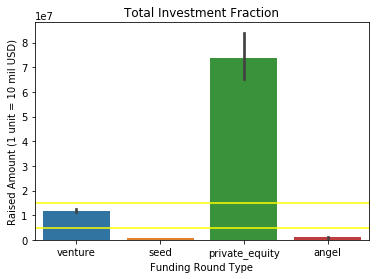

In [201]:
plt.title('Total Investment Fraction')
sns.barplot(x="funding_round_type", y="raised_amount_usd", data=master_frame_copy)
plt.xlabel('Funding Round Type')
plt.ylabel('Raised Amount (1 unit = 10 mil USD)')
plt.axhline(5000000, color='yellow')
plt.axhline(15000000, color='yellow')
plt.show()

<b>2. Plot showing the top 9 countries against the total amount of investments of funding type FT

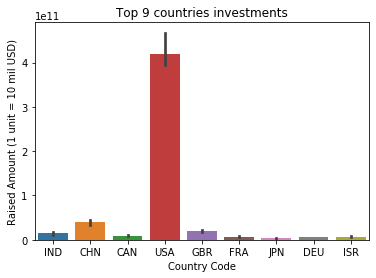

In [202]:
plt.title('Top 9 countries investments')
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.xlabel('Country Code')
plt.ylabel('Raised Amount (1 unit = 10 mil USD)')
plt.show()

<b>3. Plot showing the number of investments in the top 3 sectors of the top countries</b><br>
    Add all Top countries data into a single dataframe

In [203]:
top_dataframe = D1[D1.main_sector.isin(['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising'])]

In [204]:
top_dataframe.shape

(7132, 15)

In [205]:
top_dataframe = top_dataframe.append(D2[D2.main_sector.isin(['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising'])])

In [206]:
top_dataframe.shape

(7500, 15)

In [207]:
top_dataframe = top_dataframe.append(D3[D3.main_sector.isin(['Others', 'News, Search and Messaging', 'Entertainment'])])

In [208]:
top_dataframe.shape

(7694, 15)

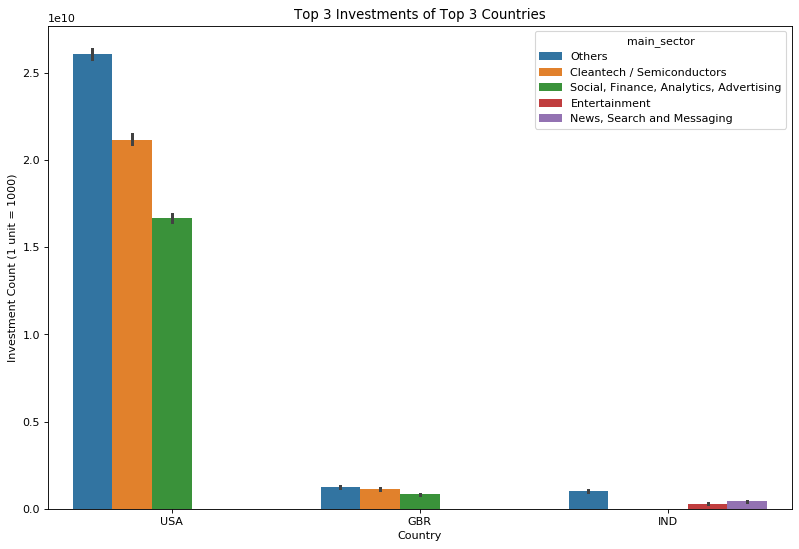

In [209]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="main_sector"
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=top_dataframe, estimator=sum)
plt.title('Top 3 Investments of Top 3 Countries')
plt.xlabel('Country')
plt.ylabel('Investment Count (1 unit = 1000)')
plt.show()